# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [1]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [18]:
# Etterspørsel i likning (1)

def x_d(p, T):
    return 500 - 3.2*(p*T)

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


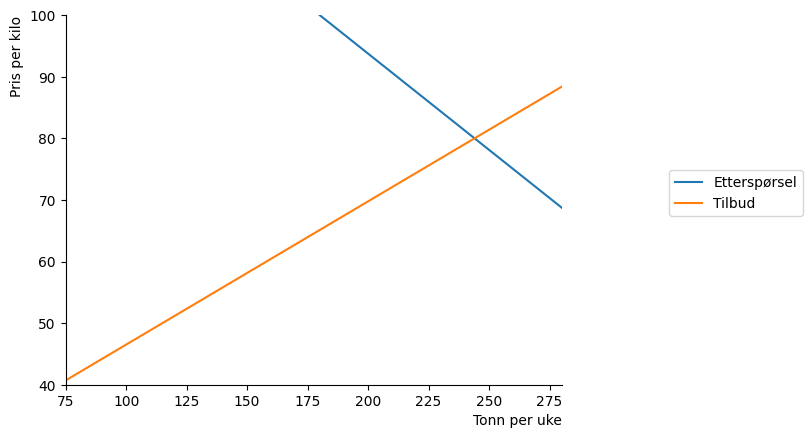

In [19]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num, 1),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


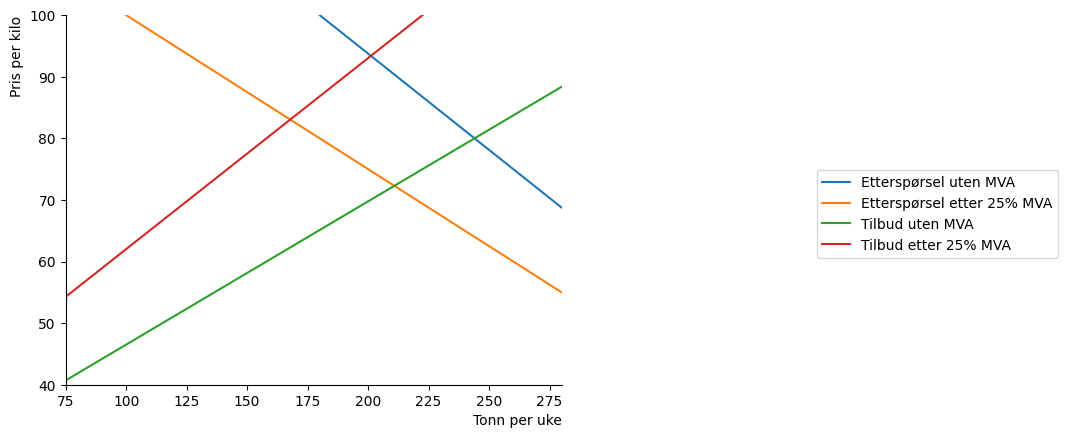

In [21]:
# OPPG 1

# kopierer figuren ovenfor

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# legger til linjer for m/MVA

ax.plot(x_d(p_num, 1),p_num, label='Etterspørsel uten MVA')
ax.plot(x_d(p_num, 1.25),p_num, label='Etterspørsel med 25% MVA')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud uten MVA')
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% MVA')

ax.legend(bbox_to_anchor=(1.5,0.6));

Skarpere helning på tilbudsfunksjonen betyr at den blir mindre elastisk. Dette kommer av at produsenten tjener mindre per krone på økt kvanta og behøver dermed en høyere pris for å kompensere.

In [90]:
# OPPG 2

# definer symboler i sympy *kopiert fra notater "Forelesning 5"

x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt u/MVA

eq_cond_u_MVA=sp.Eq(x_d(p, 1),x_s(p,0))
p_eq_u_MVA = sp.solve(eq_cond_u_MVA, p)

#betingelse for likevekt m/MVA

eq_cond_m_MVA=sp.Eq(x_d(p, 1.25),x_s(p,0.25))
p_eq_m_MVA = sp.solve(eq_cond_m_MVA, p)

x_eq_m_MVA=(x_s(p_eq_m_MVA[0], 0.25))

print(f"""likevekt uten MVA: pris: {p_eq_u_MVA[0]}, kvantum {x_d(p_eq_u_MVA[0], 1)}
med MVA: pris: {p_eq_m_MVA[0]}, kvantum: {x_s(p_eq_m_MVA[0],0.25)}""")

eq_cond_m_MVA
p_eq_m_MVA
x_eq_m_MVA


likevekt uten MVA: pris: 80.0000000000000, kvantum 244.000000000000
med MVA: pris: 83.0449826989619, kvantum: 167.820069204152


167.820069204152

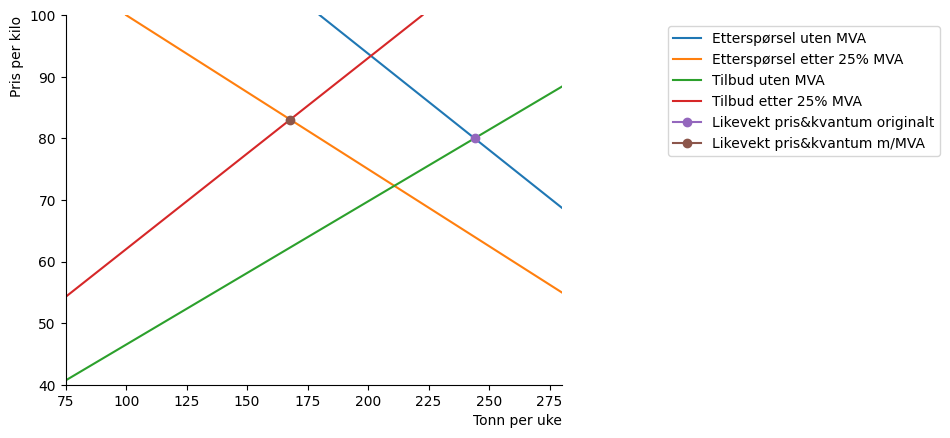

In [167]:
# OPPG 2 cont. vis i figuren

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x_d(p_num, 1),p_num, label='Etterspørsel uten MVA')
ax.plot(x_d(p_num, 1.25),p_num, label='Etterspørsel etter 25% MVA')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud uten MVA')
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud etter 25% MVA')

# Legger til punktene for likevekt pris&kvantum uten og med MVA

ax.plot(x_d(p_eq_u_MVA[0], 1), p_eq_u_MVA[0], marker="o", label= "Likevekt pris&kvantum originalt")
ax.plot(x_d(p_eq_m_MVA[0], 1.25), p_eq_m_MVA[0], marker= "o", label= "Likevekt pris&kvantum m/MVA")

ax.legend(bbox_to_anchor=(1.2,0.6));

In [242]:
# OPPG 3 

eq_cond_m_MVA=sp.Eq(x_d(p, 1.25),x_s(p,0.25))
p_eq_m_MVA = sp.solve(eq_cond_m_MVA, p)

eq_cond_m_MVA
p_eq_m_MVA[0]

# likevektsfunction

p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq_m_MVA[0]
)

#avrundet kvanta

x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq_m_MVA
)
# likevekt kvanta
x_opt_m_MVA = x_eq_fn(1.25, 0)
#pris konsumment betaler
p_kons_m_MVA = p_eq_fn(1.25, 0)
#pris produsent får
p_prod_m_MVA = p_kons_m_MVA - p_kons_m_MVA*0.25
#hva staten tjener
p_stat = p_kons_m_MVA - p_prod_m_MVA

p_stat

20.76124567474048

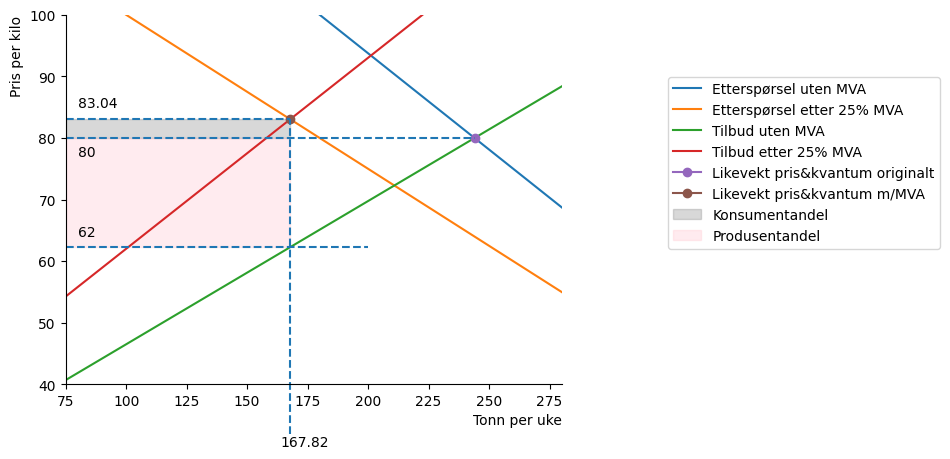

In [241]:
# OPPG3 cont.

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x_d(p_num, 1),p_num, label='Etterspørsel uten MVA')
ax.plot(x_d(p_num, 1.25),p_num, label='Etterspørsel etter 25% MVA')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud uten MVA')
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud etter 25% MVA')

ax.plot(x_d(p_eq_u_MVA[0], 1), p_eq_u_MVA[0], marker="o", label= "Likevekt pris&kvantum originalt")
ax.plot(x_d(p_eq_m_MVA[0], 1.25), p_eq_m_MVA[0], marker= "o", label= "Likevekt pris&kvantum m/MVA")

#Lager linjer som viser pris, u/Mva pris, kvanta
ax.vlines(x_d(p_eq_m_MVA[0], 1.25), 32, p_eq_m_MVA[0], linestyles='dashed', clip_on=False)
ax.annotate(round(x_eq_m_MVA, 2), xy=(x_eq_m_MVA-4, 30), annotation_clip=False)

ax.hlines(p_eq_m_MVA[0],75,x_d(p_eq_m_MVA[0], 1.25), linestyles='dashed', clip_on=False)
ax.annotate(round(p_eq_m_MVA[0], 2), xy=(80, 85), annotation_clip=False)

# hvor mye produsenten sitter igjen med
ax.hlines(p_prod_m_MVA,75, 200, linestyles='dashed', clip_on=False)
ax.annotate(round(p_prod_m_MVA), xy=(80, 64), annotation_clip=False)

# Illustrere hvem som betaler hvilken del av avgiften

q=np.linspace (75, x_eq_fn(1.25,0), 100)

# Likevektspris u/MVA
ax.hlines(p_eq_u_MVA[0],75,x_d(p_eq_u_MVA[0], 1), linestyles='dashed', clip_on=False)
ax.annotate(round(p_eq_u_MVA[0]), xy=(80, 77), annotation_clip=False)

ax.fill_between(q, 80, p_kons_m_MVA, color = "gray",alpha = 0.3,label='Konsumentandel')
ax.fill_between(q, p_prod_m_MVA, 80, color = "pink",alpha = 0.3,label='Produsentandel')


ax.legend(bbox_to_anchor=(1.2,0.6));

array([220.        , 219.47292999, 218.94585998, 218.41878998,
       217.89171997, 217.36464996, 216.83757995, 216.31050994,
       215.78343994, 215.25636993, 214.72929992, 214.20222991,
       213.6751599 , 213.1480899 , 212.62101989, 212.09394988,
       211.56687987, 211.03980986, 210.51273986, 209.98566985,
       209.45859984, 208.93152983, 208.40445982, 207.87738982,
       207.35031981, 206.8232498 , 206.29617979, 205.76910978,
       205.24203977, 204.71496977, 204.18789976, 203.66082975,
       203.13375974, 202.60668973, 202.07961973, 201.55254972,
       201.02547971, 200.4984097 , 199.97133969, 199.44426969,
       198.91719968, 198.39012967, 197.86305966, 197.33598965,
       196.80891965, 196.28184964, 195.75477963, 195.22770962,
       194.70063961, 194.17356961, 193.6464996 , 193.11942959,
       192.59235958, 192.06528957, 191.53821957, 191.01114956,
       190.48407955, 189.95700954, 189.42993953, 188.90286953,
       188.37579952, 187.84872951, 187.3216595 , 186.79

OPPG 3

Fordeler med MVA: Den treffer avhengig av forbruk, mer nøytralt ovenfor produsenter og prisendringer, mer kontroll over forbruk
Ulemper med MVA: Vanskelig å definere hva som skal beskattes i ulike grader, Mva-fritak, bedrifter må betale en større del

Fordeler med stykkpriskostnad: Enkelt, produsenten vet nøyaktig hvor mye de kan sitte igjen med.
Ulemper med stykkpriskostnad: Tar ikke hensyn til kostnader ved produksjon og eventuelle endringer i disse, dtørre forskjeller mellom etablerte produsenter som har mulighet til å produsere i høye kvanta og de som ikke har det